# **Data understanding and clening.**

# Downloading Dataset.

In [9]:
!mkdir ~/data
!curl -L -o ~/moscow-housing-price-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/egorkainov/moscow-housing-price-dataset
!unzip ~/moscow-housing-price-dataset.zip -d ~/data

mkdir: cannot create directory ‘/root/data’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  343k  100  343k    0     0   961k      0 --:--:-- --:--:-- --:--:--  961k
Archive:  /root/moscow-housing-price-dataset.zip
  inflating: /root/data/data.csv     


# Basic description of the raw data.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "~/data/data.csv"

print("Path to dataset files:", path)


df = pd.read_csv(path)

print("First 5 cols of the dataset:")
print(df.head())

print("\nLast 5 cols of the dataset:")
print(df.tail())

print("\nInfrormation of the dataset:")
df.info()

print("\nDescribing stats of the integer cols:")
print(df.describe())

Path to dataset files: ~/data/data.csv
First 5 lines of the dataset:
        Price Apartment type Metro station  Minutes to metro         Region  \
0   6300000.0      Secondary       Опалиха               6.0  Moscow region   
1   9000000.0      Secondary       Павшино               2.0  Moscow region   
2  11090000.0      Secondary      Мякинино              14.0  Moscow region   
3   8300000.0      Secondary      Строгино               8.0  Moscow region   
4   6450000.0      Secondary       Опалиха               6.0  Moscow region   

   Number of rooms  Area  Living area  Kitchen area  Floor  Number of floors  \
0              1.0  30.6         11.1           8.5   25.0                25   
1              1.0  49.2         20.0          10.0    6.0                15   
2              1.0  44.7         16.2          13.1   10.0                25   
3              1.0  35.1         16.0          11.0   12.0                33   
4              1.0  37.7         15.2           4.0    5

# Missing vallues check.


Nums of the missing vallues in every column:
Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64


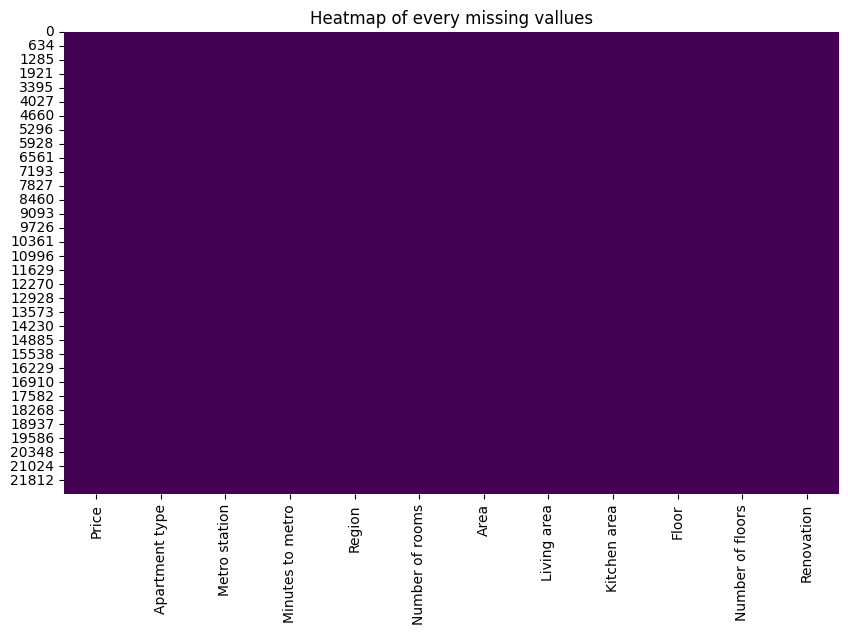

In [19]:
print("\nNums of the missing vallues in every column:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of every missing vallues')
plt.show()

In [20]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] # Just missing vallues
if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.title('Col-diagram of the missing vallues')
    plt.xlabel('Cols')
    plt.ylabel('Nums of the missing vallues')
    plt.xticks(rotation=45, ha='right') # OY -> OX (better reading)
    plt.tight_layout()
    plt.show()
    print("\nCols with missed vallues:", missing_values.index.tolist())
    remove_columns = input("Do you want to clean its cols from the dataset? (y/n): ").lower()

    if remove_columns == 'y':
        columns_to_drop = missing_values.index.tolist()
        df.drop(columns=columns_to_drop, axis=1, inplace=True)
        print(f"\nCols {columns_to_drop} has been deleted.")
        print("✅ Updated cols number:", df.shape[1])
    else:
        print("\n❌ Deletion of the cols was cancelled.")

else:
    print("\n✅ There's no any missing vallue.")


✅ There's no any missing vallue.


# Dublicates check.

In [18]:
print("\nNumber of the dublicates in data:")
print(df.duplicated().sum())


Number of the dublicates in data:
0


In [ ]:
if df.duplicated().sum() > 0:
    print("\nDublicates examples:")
    print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()))

    df = df.drop_duplicates()
    print("\n✅ Every dublicates has been deleted. Updated lines number:", len(df))
else:
    print("\n✅ There's no any dublicates.")

# Working with data types.

In [15]:
print("\nData types before transorming:")
print(df.dtypes)


Data types before transorming:
Price               float64
Apartment type       object
Metro station        object
Minutes to metro    float64
Region               object
Number of rooms     float64
Area                float64
Living area         float64
Kitchen area        float64
Floor               float64
Number of floors      int64
Renovation           object
dtype: object


In [16]:
# 'Number of rooms' & 'Floor' -> integer
df['Number of rooms'] = df['Number of rooms'].astype('Int64') # 'Int64' for NA supporting [in case for missings]
df['Floor'] = df['Floor'].astype('Int64')

# Converting categorical attributes to 'category' type (memory optimization)
categorical_cols = ['Apartment type', 'Metro station', 'Region', 'Renovation']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [17]:
print("\nData types after transorming:")
print(df.dtypes)


Data types after transorming:
Price                float64
Apartment type      category
Metro station       category
Minutes to metro     float64
Region              category
Number of rooms        Int64
Area                 float64
Living area          float64
Kitchen area         float64
Floor                  Int64
Number of floors       int64
Renovation          category
dtype: object


# **Univariate Analysis**
This section focused on analyzing each variable in the dataset individually to understand their distributions and characteristics.

# **Analysis of the Target Variable 'Price'**


Analysis of 'Price' (Target Variable):


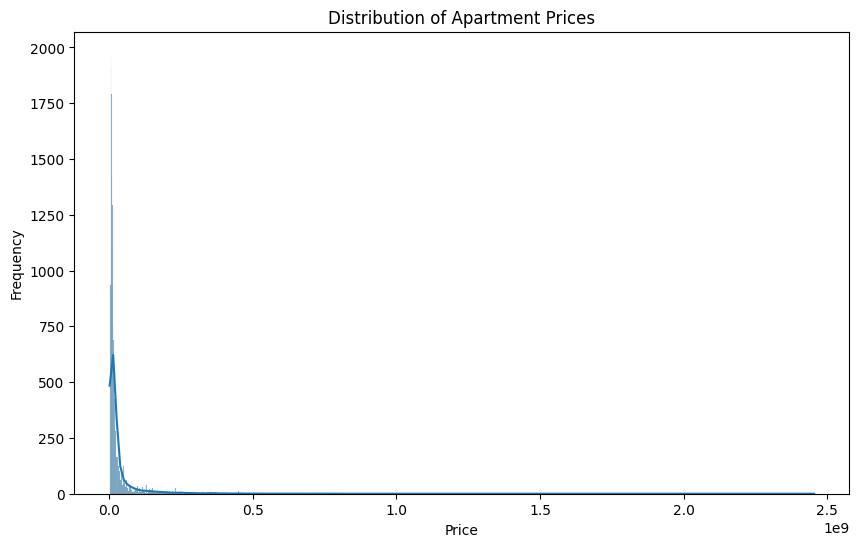

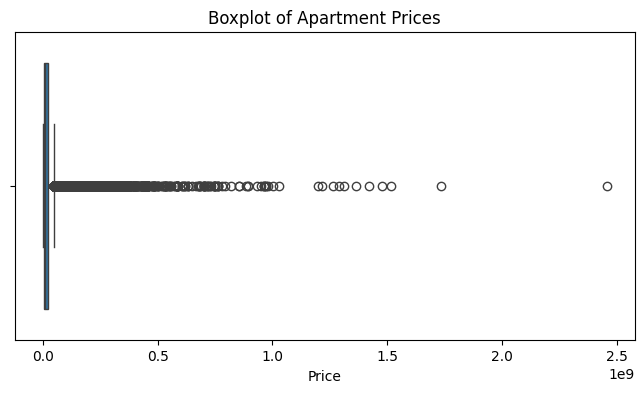

In [27]:
print("\nAnalysis of 'Price' (Target Variable):")

# Histogram of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True) # kde=True adds a kernel density estimate line
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Price to detect outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Apartment Prices')
plt.xlabel('Price')
plt.show()

In [28]:
# Descriptive Statistics of Price
print("\nDescriptive Statistics of 'Price':")
print(df['Price'].describe())


Descriptive Statistics of 'Price':
count    2.084100e+04
mean     3.403777e+07
std      7.962198e+07
min      1.150000e+06
25%      7.089768e+06
50%      1.147112e+07
75%      2.355000e+07
max      2.455020e+09
Name: Price, dtype: float64


In [30]:
# Summary for 'Price'
print("\nSummary for 'Price':")
print("- The distribution of apartment prices exhibits a strong right skew (positive skewness, confirmed by describe() output and histogram shape). This indicates that the majority of apartments are priced lower, with significantly fewer apartments at very high prices.")
print("- The mean price is considerably higher than the median, further confirming the right skew and highlighting the influence of high prices on the mean value.")
print("- The boxplot clearly illustrates a large number of outliers at the higher end of the price range, corresponding to exceptionally expensive apartments. Further investigation is needed to determine if these outliers represent genuine premium properties or data errors.")
print("- The large gap between the 75th percentile (23.5 million) and the maximum price (2.45 billion) emphasizes the significant price dispersion in the upper part of the distribution and the presence of very high-value properties.")
print("- The price distribution may require transformation (e.g., logarithmic transformation) before model building to mitigate the impact of outliers and skewness.")


Summary for 'Price':
- The distribution of apartment prices exhibits a strong right skew (positive skewness, confirmed by describe() output and histogram shape). This indicates that the majority of apartments are priced lower, with significantly fewer apartments at very high prices.
- The mean price is considerably higher than the median, further confirming the right skew and highlighting the influence of high prices on the mean value.
- The boxplot clearly illustrates a large number of outliers at the higher end of the price range, corresponding to exceptionally expensive apartments. Further investigation is needed to determine if these outliers represent genuine premium properties or data errors.
- The large gap between the 75th percentile (23.5 million) and the maximum price (2.45 billion) emphasizes the significant price dispersion in the upper part of the distribution and the presence of very high-value properties.
- The price distribution may require transformation (e.g., logari

In [31]:
# Summary for 'Price'
print("\nВыводы по 'Price':")
print("- Распределение цен на квартиры имеет выраженную правостороннюю асимметрию (положительная асимметрия, подтверждается значениями describe() и формой гистограммы). Это означает, что большинство квартир имеют более низкую цену, а дорогих квартир значительно меньше.")
print("- Средняя цена значительно выше медианы, что также подтверждает правостороннюю асимметрию и указывает на влияние высоких цен на среднее значение.")
print("- Боксплот наглядно демонстрирует наличие большого количества выбросов в верхней части диапазона цен, что соответствует квартирам с исключительно высокой стоимостью. Необходимо дополнительно изучить эти выбросы, чтобы понять, являются ли они реальными объектами премиум-класса или ошибками данных.")
print("- Большой разрыв между 75-м процентилем (23.5 млн) и максимальной ценой (2.45 млрд) подчеркивает значительный разброс цен в верхней части распределения и наличие очень дорогих объектов.")
print("- Распределение цен может потребовать преобразования (например, логарифмирования) перед построением модели, чтобы уменьшить влияние выбросов и асимметрии.")


Выводы по 'Price':
- Распределение цен на квартиры имеет выраженную правостороннюю асимметрию (положительная асимметрия, подтверждается значениями describe() и формой гистограммы). Это означает, что большинство квартир имеют более низкую цену, а дорогих квартир значительно меньше.
- Средняя цена значительно выше медианы, что также подтверждает правостороннюю асимметрию и указывает на влияние высоких цен на среднее значение.
- Боксплот наглядно демонстрирует наличие большого количества выбросов в верхней части диапазона цен, что соответствует квартирам с исключительно высокой стоимостью. Необходимо дополнительно изучить эти выбросы, чтобы понять, являются ли они реальными объектами премиум-класса или ошибками данных.
- Большой разрыв между 75-м процентилем (23.5 млн) и максимальной ценой (2.45 млрд) подчеркивает значительный разброс цен в верхней части распределения и наличие очень дорогих объектов.
- Распределение цен может потребовать преобразования (например, логарифмирования) перед

# Theory of the wrong data.

**Defining the threshold for outliers** (using IQR)

In [32]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound for price outliers: {upper_bound:.2f}")



Upper bound for price outliers: 48240348.00


Identifying outliers

In [34]:
outliers_price_df = df[df['Price'] > upper_bound]
print(f"\nNumber of apartment price outliers: {len(outliers_price_df)}")


Number of apartment price outliers: 3020


**Analyzing characteristics of outliers**

Apartment type


Apartment types among outliers:
Apartment type
Secondary       100.0
New building      0.0
Name: proportion, dtype: float64


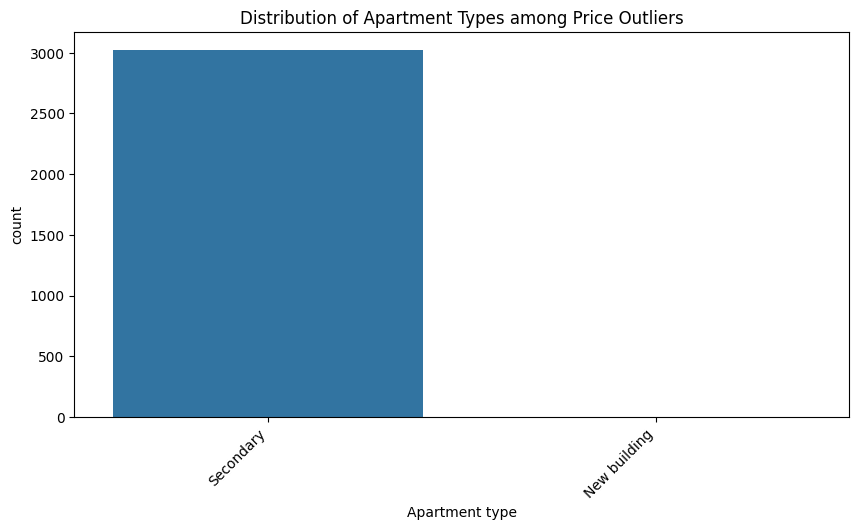

In [35]:
print("\nApartment types among outliers:")
print(outliers_price_df['Apartment type'].value_counts(normalize=True) * 100)
plt.figure(figsize=(10, 5))
sns.countplot(data=outliers_price_df, x='Apartment type', order=outliers_price_df['Apartment type'].value_counts().index)
plt.title('Distribution of Apartment Types among Price Outliers')
plt.xticks(rotation=45, ha='right')
plt.show()

Region


Regions among outliers:
Region
Moscow           99.900662
Moscow region     0.099338
Name: proportion, dtype: float64


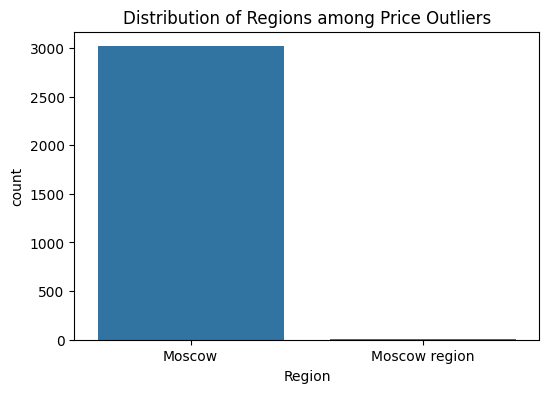

In [36]:
print("\nRegions among outliers:")
print(outliers_price_df['Region'].value_counts(normalize=True) * 100)
plt.figure(figsize=(6, 4))
sns.countplot(data=outliers_price_df, x='Region')
plt.title('Distribution of Regions among Price Outliers')
plt.show()

Metro station (Top-10)


Top-10 Metro Stations among outliers:
Metro station
Минская                   92
Смоленская                83
 Спортивная               76
ЗИЛ                       74
Арбатская                 68
 Улица 1905 года          67
Фрунзенская               53
Кропоткинская             52
 Минская                  49
Ломоносовский проспект    47
Name: count, dtype: int64


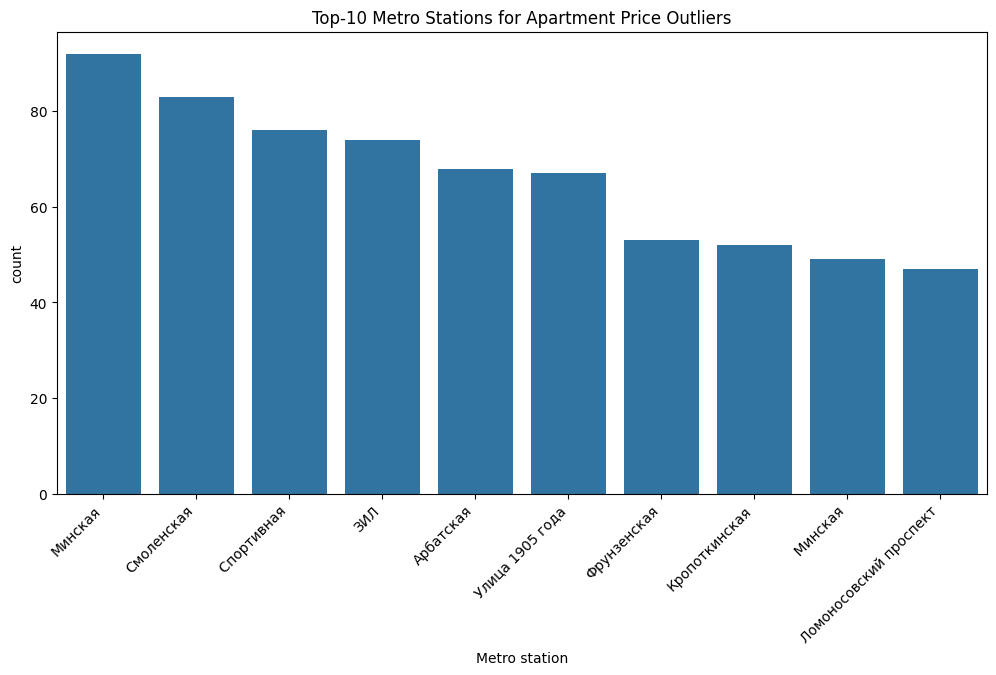

In [37]:
print("\nTop-10 Metro Stations among outliers:")
print(outliers_price_df['Metro station'].value_counts().head(10))
plt.figure(figsize=(12, 6))
sns.countplot(data=outliers_price_df, x='Metro station', order=outliers_price_df['Metro station'].value_counts().index[:10])
plt.title('Top-10 Metro Stations for Apartment Price Outliers')
plt.xticks(rotation=45, ha='right')
plt.show()

Renovation


Renovation level among outliers:
Renovation
Designer                     50.894040
Without renovation           32.847682
European-style renovation    14.006623
Cosmetic                      2.251656
Name: proportion, dtype: float64


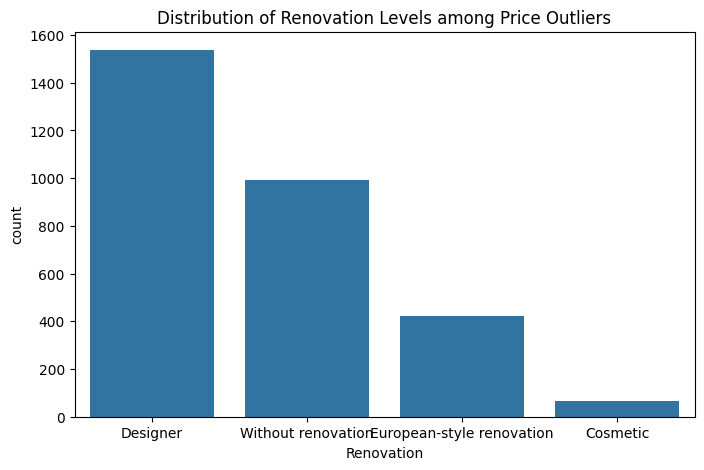

In [38]:
print("\nRenovation level among outliers:")
print(outliers_price_df['Renovation'].value_counts(normalize=True) * 100)
plt.figure(figsize=(8, 5))
sns.countplot(data=outliers_price_df, x='Renovation', order=outliers_price_df['Renovation'].value_counts().index)
plt.title('Distribution of Renovation Levels among Price Outliers')
plt.show()

Comparison of average areas of outliers and all apartments

In [39]:
area_features = ['Area', 'Living area', 'Kitchen area']
print("\nComparison of average areas (outliers vs. all apartments):")
for feature in area_features:
    mean_all = df[feature].mean()
    mean_outliers = outliers_price_df[feature].mean()
    print(f"- Average '{feature}' (all apartments): {mean_all:.2f} sq.m")
    print(f"- Average '{feature}' (outliers): {mean_outliers:.2f} sq.m")


Comparison of average areas (outliers vs. all apartments):
- Average 'Area' (all apartments): 69.71 sq.m
- Average 'Area' (outliers): 182.12 sq.m
- Average 'Living area' (all apartments): 37.49 sq.m
- Average 'Living area' (outliers): 96.30 sq.m
- Average 'Kitchen area' (all apartments): 12.42 sq.m
- Average 'Kitchen area' (outliers): 22.58 sq.m


Number of rooms


Distribution of Number of Rooms among outliers:
Number of rooms
4     35.264901
5     24.337748
3     17.715232
6     10.596026
2      6.225166
0      3.046358
1      1.324503
7      0.860927
8      0.331126
10     0.165563
9      0.099338
12     0.033113
Name: proportion, dtype: Float64


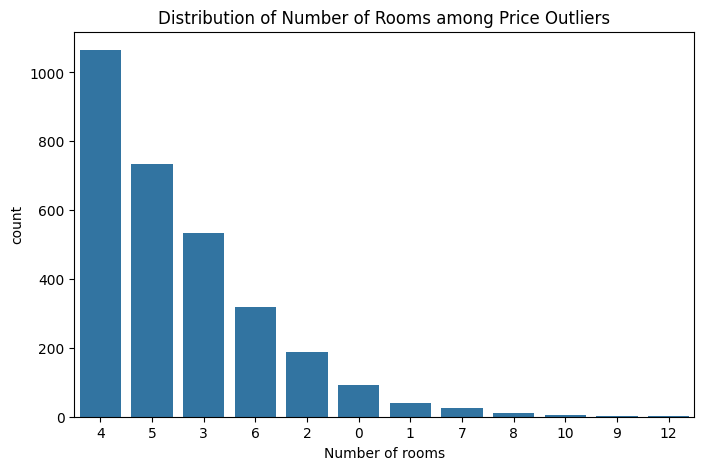

In [40]:
print("\nDistribution of Number of Rooms among outliers:")
print(outliers_price_df['Number of rooms'].value_counts(normalize=True) * 100)
plt.figure(figsize=(8, 5))
sns.countplot(data=outliers_price_df, x='Number of rooms', order=outliers_price_df['Number of rooms'].value_counts().index)
plt.title('Distribution of Number of Rooms among Price Outliers')
plt.show()

Floor and Number of floors (average values)

In [41]:
print("\nAverage Floor and Number of floors (outliers vs. all apartments):")
floor_features = ['Floor', 'Number of floors']
for feature in floor_features:
    mean_all = df[feature].mean()
    mean_outliers = outliers_price_df[feature].mean()
    print(f"- Average '{feature}' (all apartments): {mean_all:.2f}")
    print(f"- Average '{feature}' (outliers): {mean_outliers:.2f}")


Average Floor and Number of floors (outliers vs. all apartments):
- Average 'Floor' (all apartments): 9.18
- Average 'Floor' (outliers): 10.69
- Average 'Number of floors' (all apartments): 16.59
- Average 'Number of floors' (outliers): 18.58


## Выводы по исследованию выбросов цен

**Исследование выбросов цен на квартиры выявило следующие ключевые характеристики:**

*   **Тип квартиры:** Практически все выбросы (100%) относятся к типу **"Вторичка" (Secondary)**. Это неожиданно, так как можно было бы предположить, что самые дорогие квартиры будут в новостройках. Возможно, категория "Вторичка" включает элитное жилье старого фонда в престижных районах.
*   **Регион:**  Почти все выбросы (99.9%) находятся в **Москве**. Это ожидаемо, поскольку цены на жилье в Москве, как правило, выше, чем в Московской области.
*   **Станции метро:**  Среди топ-10 станций метро, связанных с выбросами, преобладают известные и престижные станции Москвы, такие как **"Минская", "Смоленская", "Спортивная", "Зил", "Арбатская", "Улица 1905 года", "Фрунзенская", "Кропоткинская", "Ломоносовский проспект"**.  Это подтверждает, что выбросы цен связаны с квартирами в престижных районах города.
*   **Ремонт:**  Среди выбросов преобладает **"Дизайнерский ремонт" (Designer)** (50.9%), но значительную долю также составляют квартиры **"Без ремонта" (Without renovation)** (32.8%).  Наличие квартир "Без ремонта" среди выбросов может указывать на то, что ценность этих объектов обусловлена в первую очередь престижным местоположением, а не состоянием ремонта, или же это объекты, приобретаемые под индивидуальную высококлассную отделку.
*   **Площадь:**  Средние значения **общей площади (Area), жилой площади (Living area) и площади кухни (Kitchen area)** для выбросов значительно выше, чем для всех квартир в датасете. Это явно указывает на то, что выбросы - это квартиры большей площади.
*   **Количество комнат:**  Наиболее часто встречающееся количество комнат среди выбросов - **4, 5 и 6**.  Это согласуется с выводом о большей площади и указывает на то, что выбросы часто представляют собой просторные семейные квартиры.
*   **Этаж и Этажность:**  Средний **этаж (Floor)** и средняя **этажность (Number of floors)** для выбросов несколько выше, чем для всех квартир. Это может говорить о том, что выбросы чаще встречаются в более высоких зданиях и на более высоких этажах, возможно, с лучшими видовыми характеристиками или в более современных домах.

**Общий вывод:**

Выбросы цен, вероятно, представляют собой **действительно элитные квартиры, расположенные в Москве**, характеризующиеся **большей площадью, престижным местоположением и часто дизайнерским ремонтом (хотя встречаются и варианты без ремонта в силу ценности локации)**.  Вероятно, **не стоит удалять эти выбросы без веских оснований**, так как они являются важной частью рынка элитного жилья Москвы.  Вместо удаления, для уменьшения их влияния на некоторые модели машинного обучения, может быть целесообразно **применить преобразование целевой переменной "Цена", например, логарифмирование**.

# **Bivariate & Multivariate Analysis**
This section explores relationships between variables and between features and the target variable 'Price'.

Price vs. Numerical Features


1. Price vs. Numerical Features:


--- Relationship between Price and 'Minutes to metro': ---


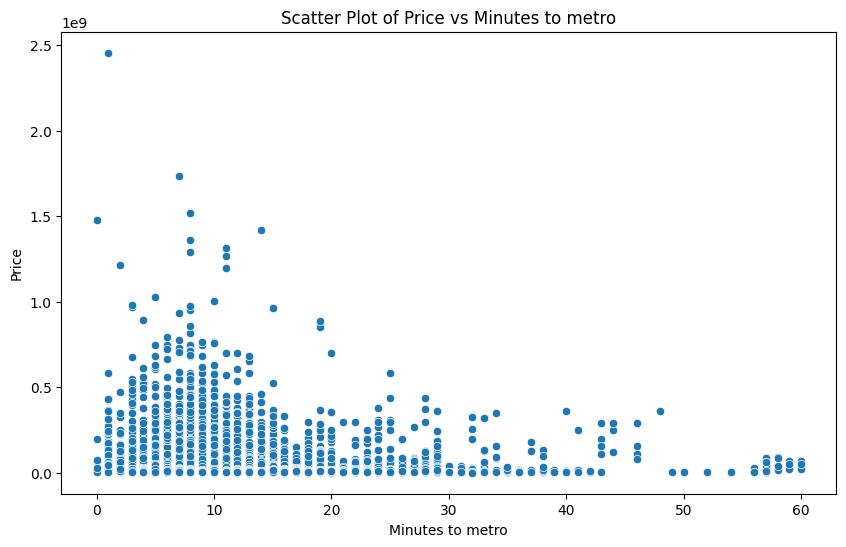

Pearson correlation between Price and 'Minutes to metro': -0.094

Summary:
- Observe the trend in the scatter plot. Is there a negative correlation (price decreases with increasing minutes to metro)? Or is the relationship weak?
- The correlation coefficient quantifies the linear relationship. Values closer to 1 or -1 indicate stronger linear correlation. Values close to 0 indicate weak linear correlation.

--- Relationship between Price and 'Number of rooms': ---


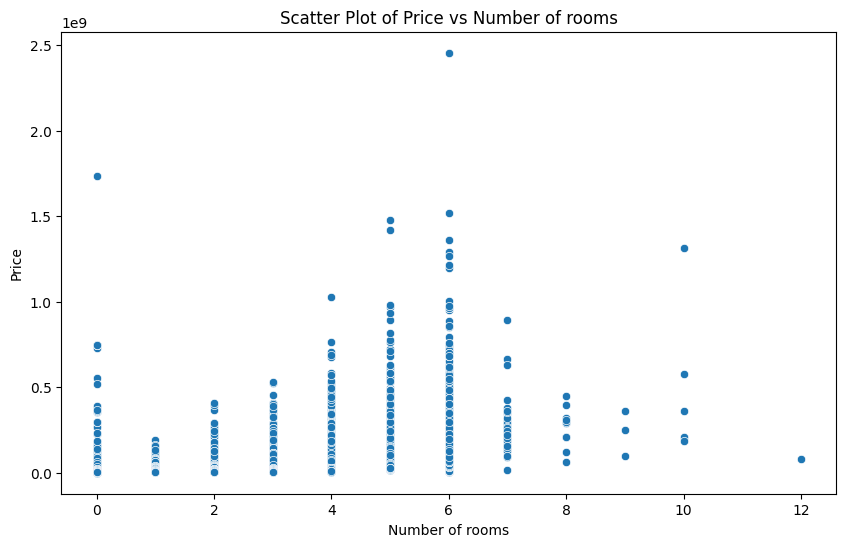

Pearson correlation between Price and 'Number of rooms': 0.475

Summary:
- Expect a positive correlation. Larger apartments (more rooms) generally cost more. Check the strength of the correlation and the scatter plot pattern.
- The correlation coefficient quantifies the linear relationship. Values closer to 1 or -1 indicate stronger linear correlation. Values close to 0 indicate weak linear correlation.

--- Relationship between Price and 'Area': ---


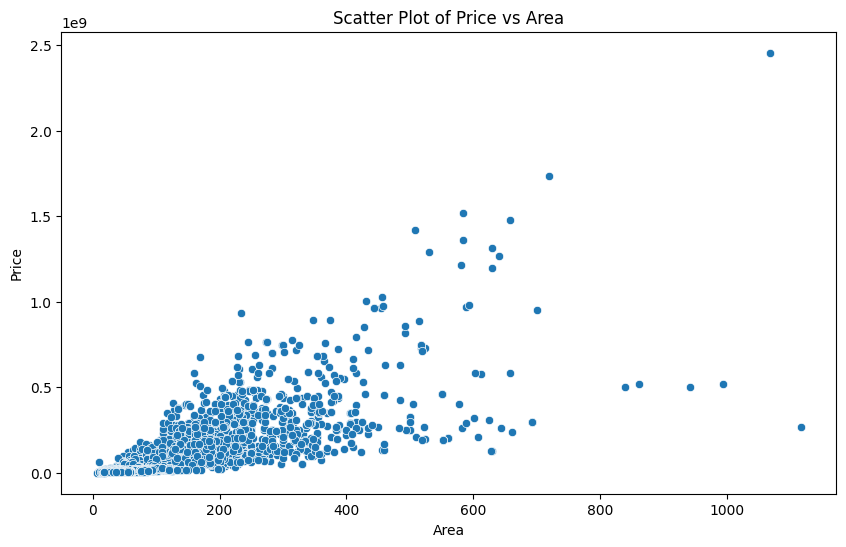

Pearson correlation between Price and 'Area': 0.791

Summary:
- Expect positive correlations. Larger area usually means higher price. Examine the strength and linearity of these relationships.
- The correlation coefficient quantifies the linear relationship. Values closer to 1 or -1 indicate stronger linear correlation. Values close to 0 indicate weak linear correlation.

--- Relationship between Price and 'Living area': ---


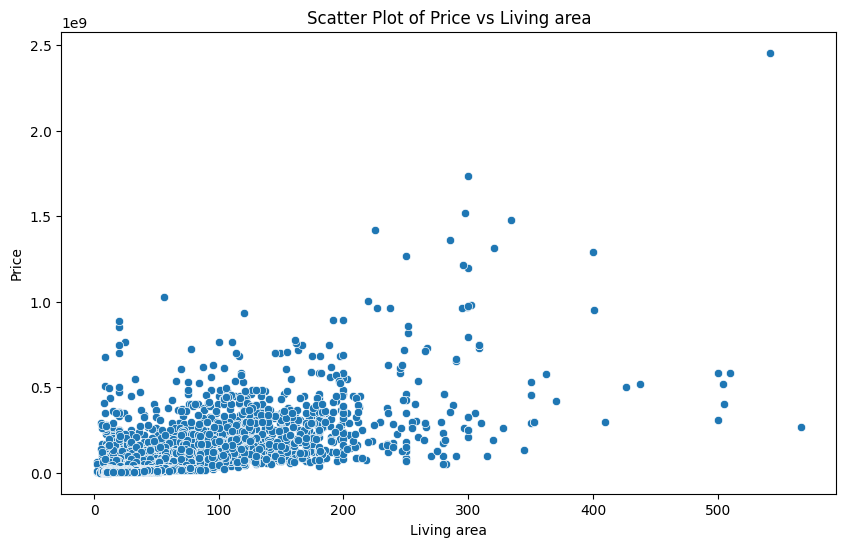

Pearson correlation between Price and 'Living area': 0.714

Summary:
- Expect positive correlations. Larger area usually means higher price. Examine the strength and linearity of these relationships.
- The correlation coefficient quantifies the linear relationship. Values closer to 1 or -1 indicate stronger linear correlation. Values close to 0 indicate weak linear correlation.

--- Relationship between Price and 'Kitchen area': ---


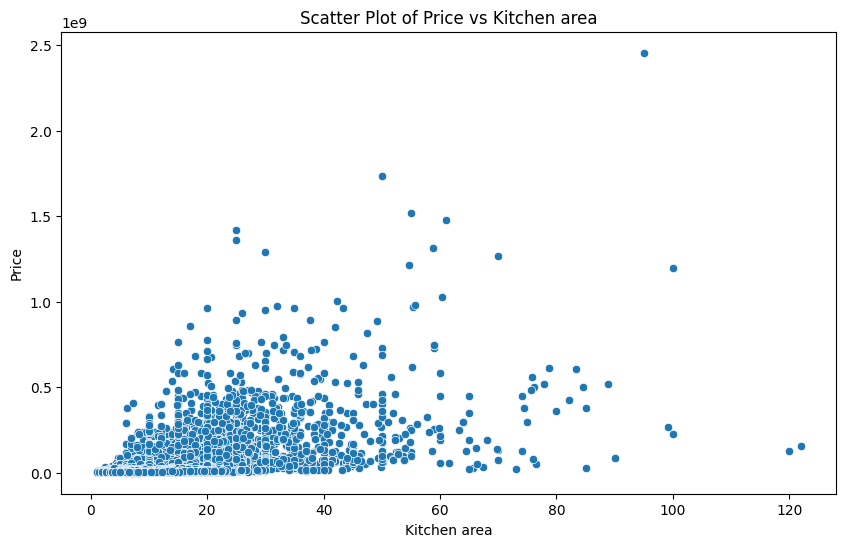

Pearson correlation between Price and 'Kitchen area': 0.560

Summary:
- Expect positive correlations. Larger area usually means higher price. Examine the strength and linearity of these relationships.
- The correlation coefficient quantifies the linear relationship. Values closer to 1 or -1 indicate stronger linear correlation. Values close to 0 indicate weak linear correlation.

--- Relationship between Price and 'Floor': ---


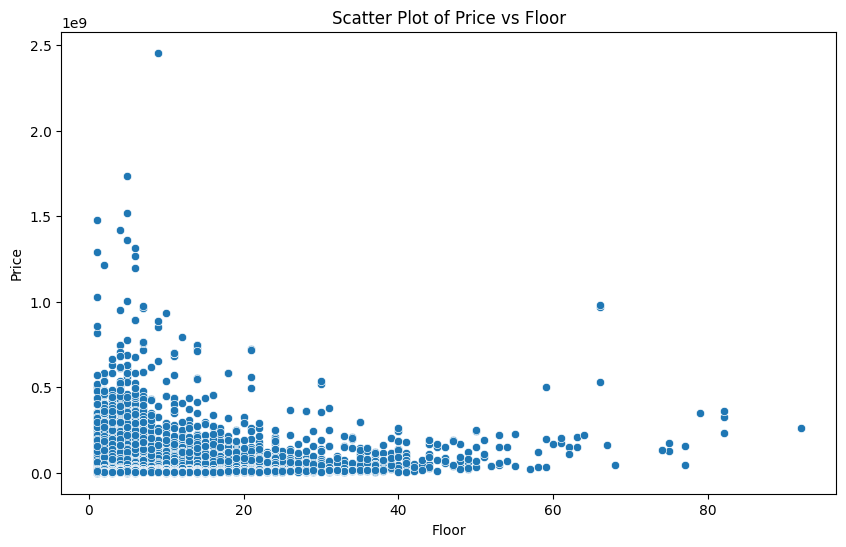

Pearson correlation between Price and 'Floor': 0.020

Summary:
- The relationship might be less linear. Price might increase with floor up to a point, then possibly decrease for very high floors, or depend on 'Number of floors'. Observe the scatter plot pattern.
- The correlation coefficient quantifies the linear relationship. Values closer to 1 or -1 indicate stronger linear correlation. Values close to 0 indicate weak linear correlation.

--- Relationship between Price and 'Number of floors': ---


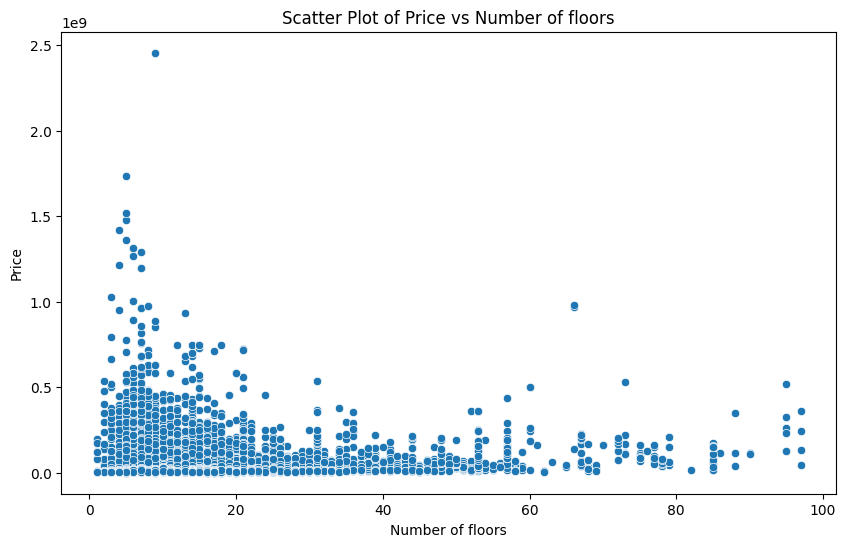

Pearson correlation between Price and 'Number of floors': -0.017

Summary:
- The relationship might be less linear. Price might increase with floor up to a point, then possibly decrease for very high floors, or depend on 'Number of floors'. Observe the scatter plot pattern.
- The correlation coefficient quantifies the linear relationship. Values closer to 1 or -1 indicate stronger linear correlation. Values close to 0 indicate weak linear correlation.


In [44]:
print("\n1. Price vs. Numerical Features:\n")

numerical_features = ['Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']

for feature in numerical_features:
    print(f"\n--- Relationship between Price and '{feature}': ---")

    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='Price')
    plt.title(f'Scatter Plot of Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

    # Calculate Correlation
    correlation = df[['Price', feature]].corr().iloc[0, 1] # Extract correlation between Price and feature
    print(f"Pearson correlation between Price and '{feature}': {correlation:.3f}")
    print("\nSummary:")
    if feature == 'Minutes to metro':
        print("- Observe the trend in the scatter plot. Is there a negative correlation (price decreases with increasing minutes to metro)? Or is the relationship weak?")
    elif feature == 'Number of rooms':
        print("- Expect a positive correlation. Larger apartments (more rooms) generally cost more. Check the strength of the correlation and the scatter plot pattern.")
    elif feature in ['Area', 'Living area', 'Kitchen area']:
        print("- Expect positive correlations. Larger area usually means higher price. Examine the strength and linearity of these relationships.")
    elif feature in ['Floor', 'Number of floors']:
        print("- The relationship might be less linear. Price might increase with floor up to a point, then possibly decrease for very high floors, or depend on 'Number of floors'. Observe the scatter plot pattern.")
    print("- The correlation coefficient quantifies the linear relationship. Values closer to 1 or -1 indicate stronger linear correlation. Values close to 0 indicate weak linear correlation.")

Correlation Matrix for all Numerical Features and Price


Correlation Matrix for Numerical Features and Price:


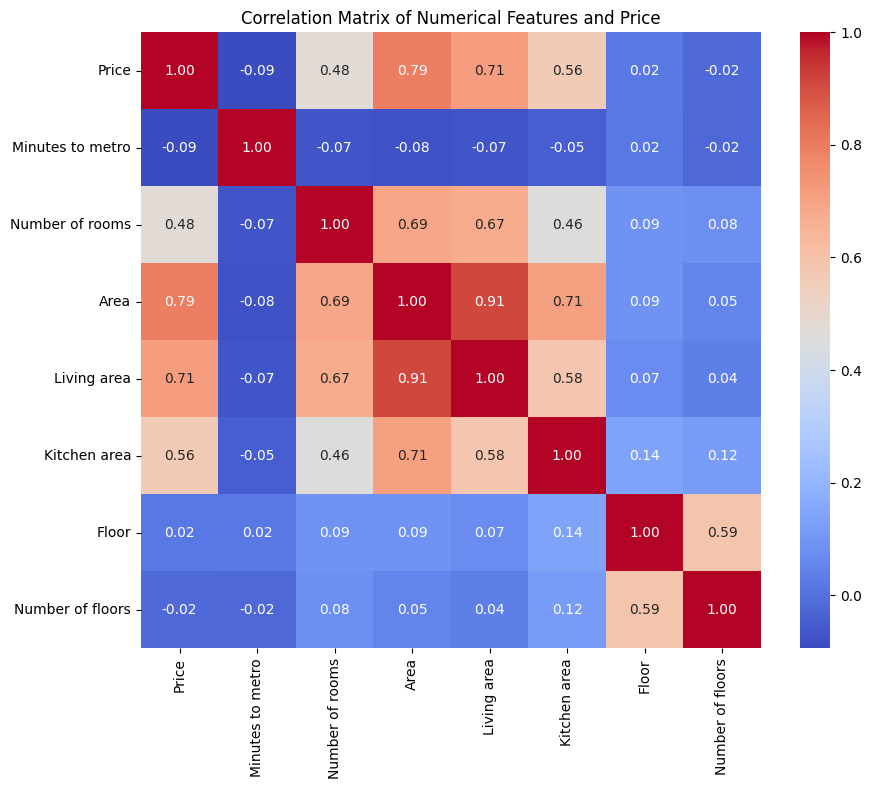


Summary for Correlation Matrix:
- Examine the correlation coefficients between 'Price' and each numerical feature. Confirm the observations from scatter plots and individual correlations.
- Look for correlations between numerical features themselves (multicollinearity), especially among 'Area', 'Living area', and 'Kitchen area'. High correlation between features might require addressing in modeling.


In [45]:
print("\nCorrelation Matrix for Numerical Features and Price:")
correlation_matrix = df[['Price'] + numerical_features].corr() # Include 'Price' and all numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # annot=True for values, fmt=".2f" for 2 decimal places
plt.title('Correlation Matrix of Numerical Features and Price')
plt.show()

print("\nSummary for Correlation Matrix:")
print("- Examine the correlation coefficients between 'Price' and each numerical feature. Confirm the observations from scatter plots and individual correlations.")
print("- Look for correlations between numerical features themselves (multicollinearity), especially among 'Area', 'Living area', and 'Kitchen area'. High correlation between features might require addressing in modeling.")


Price vs. Categorical Features


2. Price vs. Categorical Features:


--- Relationship between Price and 'Apartment type': ---


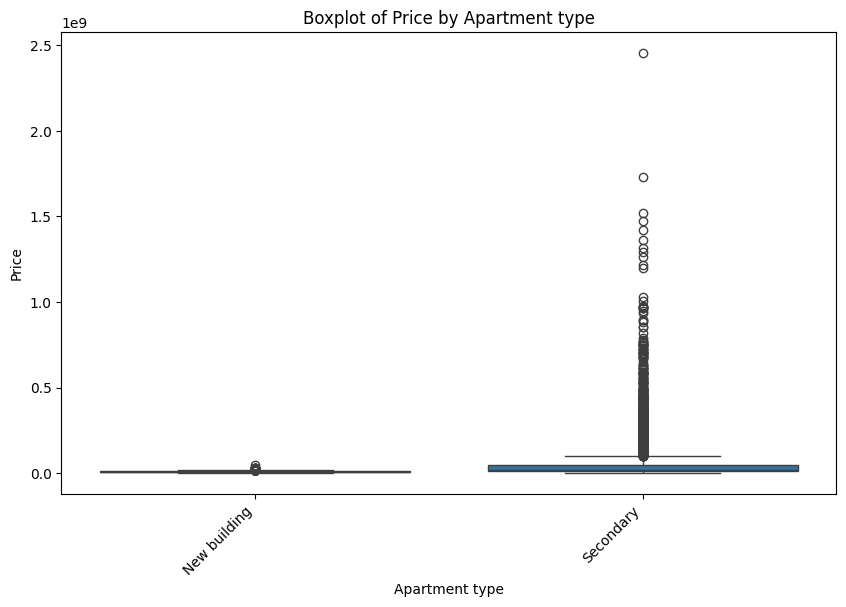

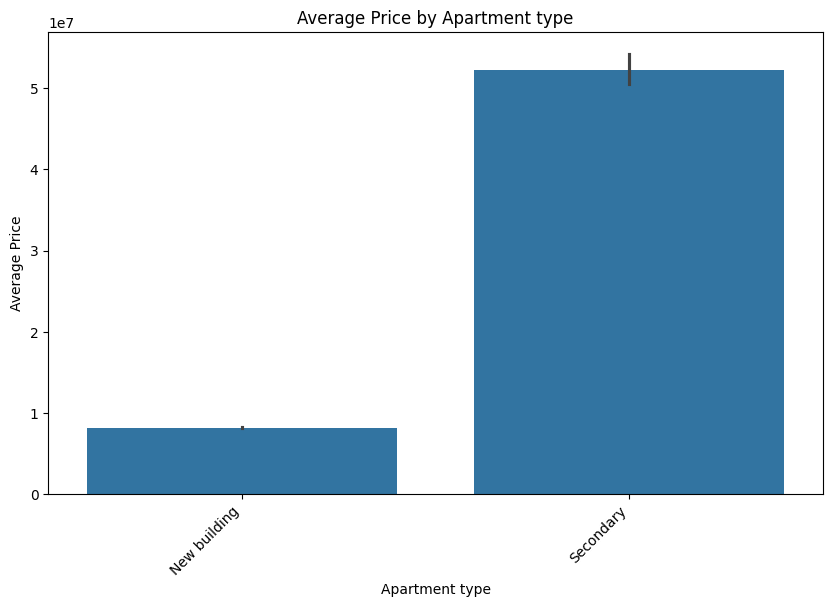


Summary:
- Compare the median and distribution of prices across different apartment types. Are there significant price differences between types?
- Boxplots show the distribution and potential outliers for each category. Bar plots show the average price, allowing for direct comparison of average prices across categories.

--- Relationship between Price and 'Region': ---


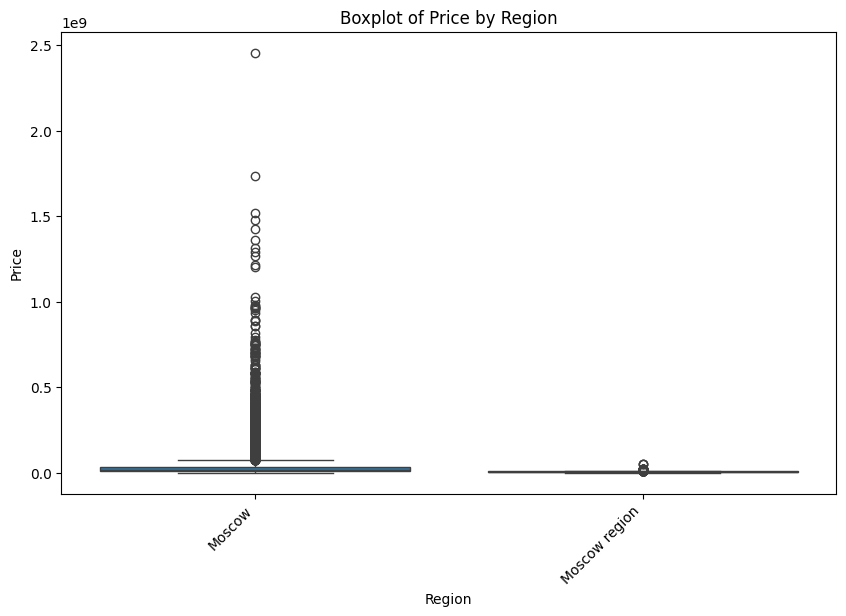

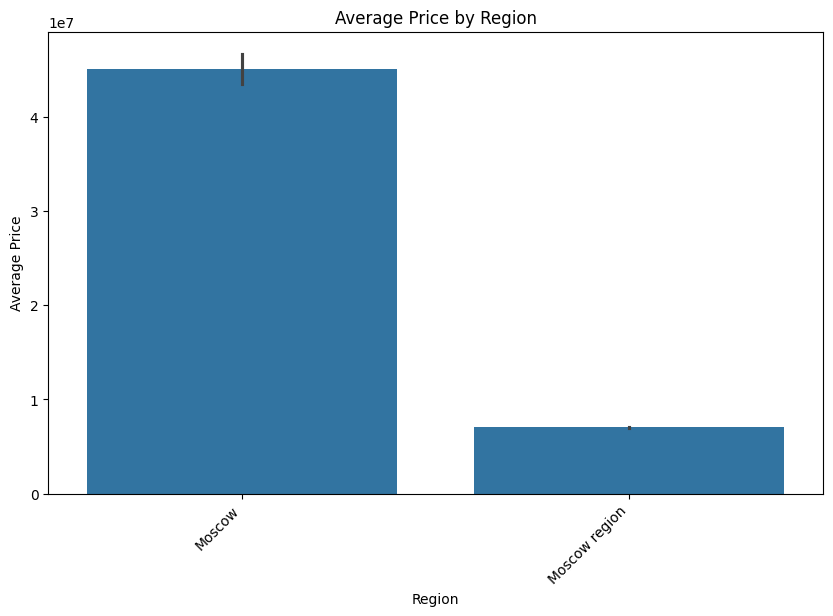


Summary:
- Compare prices in 'Moscow' vs. 'Moscow region'. Expect Moscow to have higher prices. Quantify the price difference.
- Boxplots show the distribution and potential outliers for each category. Bar plots show the average price, allowing for direct comparison of average prices across categories.

--- Relationship between Price and 'Renovation': ---


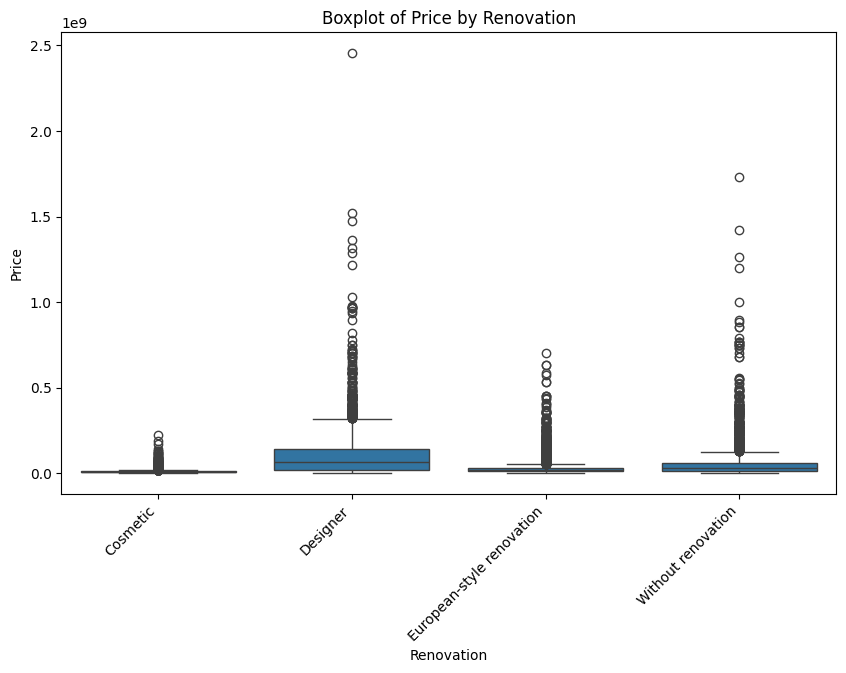

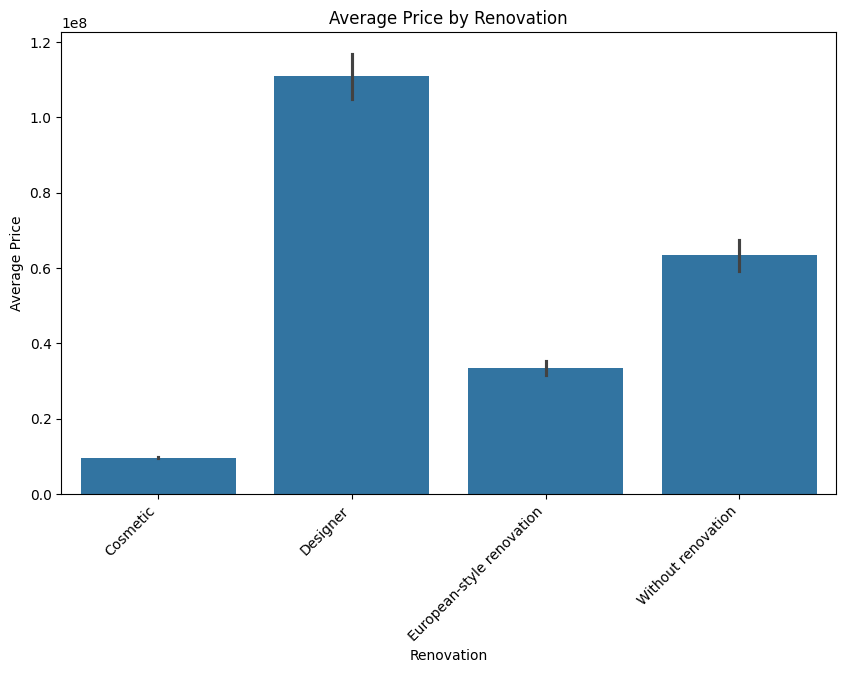


Summary:
- Examine how price varies with renovation level. Expect 'euro renovation' and 'designer renovation' to have higher prices than 'cosmetic' or 'no renovation'.
- Boxplots show the distribution and potential outliers for each category. Bar plots show the average price, allowing for direct comparison of average prices across categories.


In [46]:
print("\n2. Price vs. Categorical Features:\n")

categorical_features = ['Apartment type', 'Region', 'Renovation'] # Removed 'Metro station' for now, as it might be too many categories

for feature in categorical_features:
    print(f"\n--- Relationship between Price and '{feature}': ---")

    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y='Price')
    plt.title(f'Boxplot of Price by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Bar plot of Mean Price
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=feature, y='Price', errorbar='ci') # ci='sd' or 'ci' for confidence interval
    plt.title(f'Average Price by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    print("\nSummary:")
    if feature == 'Apartment type':
        print("- Compare the median and distribution of prices across different apartment types. Are there significant price differences between types?")
    elif feature == 'Region':
        print("- Compare prices in 'Moscow' vs. 'Moscow region'. Expect Moscow to have higher prices. Quantify the price difference.")
    elif feature == 'Renovation':
        print("- Examine how price varies with renovation level. Expect 'euro renovation' and 'designer renovation' to have higher prices than 'cosmetic' or 'no renovation'.")
    print("- Boxplots show the distribution and potential outliers for each category. Bar plots show the average price, allowing for direct comparison of average prices across categories.")

Multicollinearity Check (between Numerical Features)


3. Multicollinearity Check (between Numerical Features):


Correlation Matrix of Numerical Features (excluding Price):


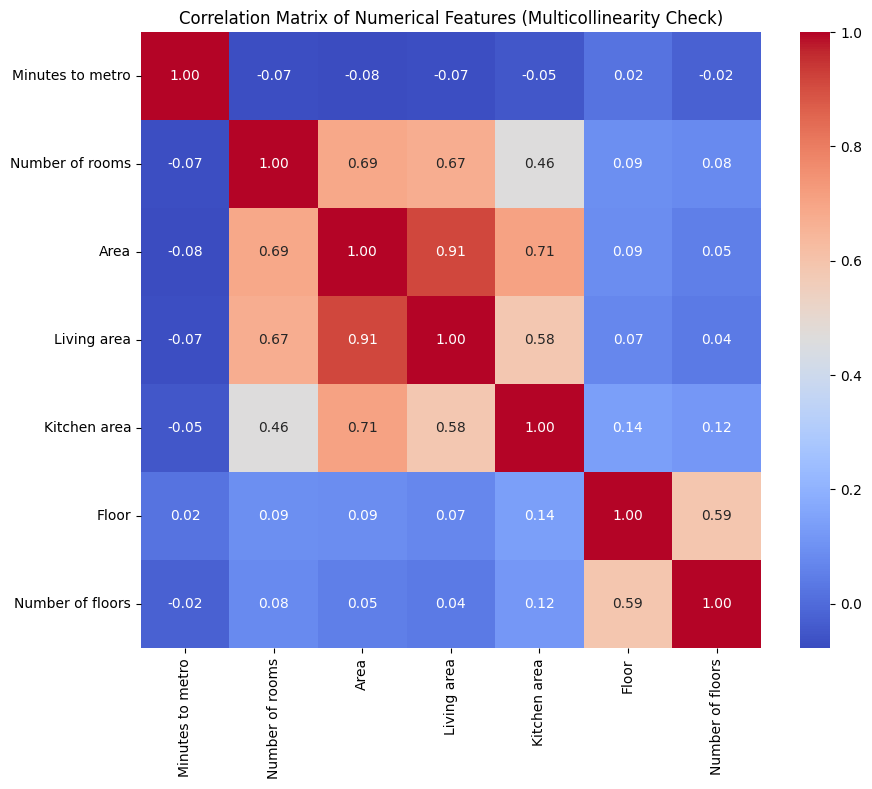


Summary for Multicollinearity:
- Focus on correlations *between* numerical features. High correlations (e.g., > 0.7 or 0.8 in absolute value) indicate potential multicollinearity.
- Pay special attention to correlations between 'Area', 'Living area', 'Kitchen area', and possibly 'Number of rooms'.
- Multicollinearity can inflate variance of regression coefficients in linear models. Consider addressing it through feature selection, dimensionality reduction, or regularization if using linear models.


In [47]:
print("\n3. Multicollinearity Check (between Numerical Features):\n")

print("\nCorrelation Matrix of Numerical Features (excluding Price):")
numerical_features_only = ['Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']
correlation_matrix_features = df[numerical_features_only].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_features, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Multicollinearity Check)')
plt.show()

print("\nSummary for Multicollinearity:")
print("- Focus on correlations *between* numerical features. High correlations (e.g., > 0.7 or 0.8 in absolute value) indicate potential multicollinearity.")
print("- Pay special attention to correlations between 'Area', 'Living area', 'Kitchen area', and possibly 'Number of rooms'.")
print("- Multicollinearity can inflate variance of regression coefficients in linear models. Consider addressing it through feature selection, dimensionality reduction, or regularization if using linear models.")

Pair Plots for Numerical Features (can be computationally intensive for many features)


4. Pair Plots for Numerical Features (Optional):

Generating Pair Plots (this might take a while)...


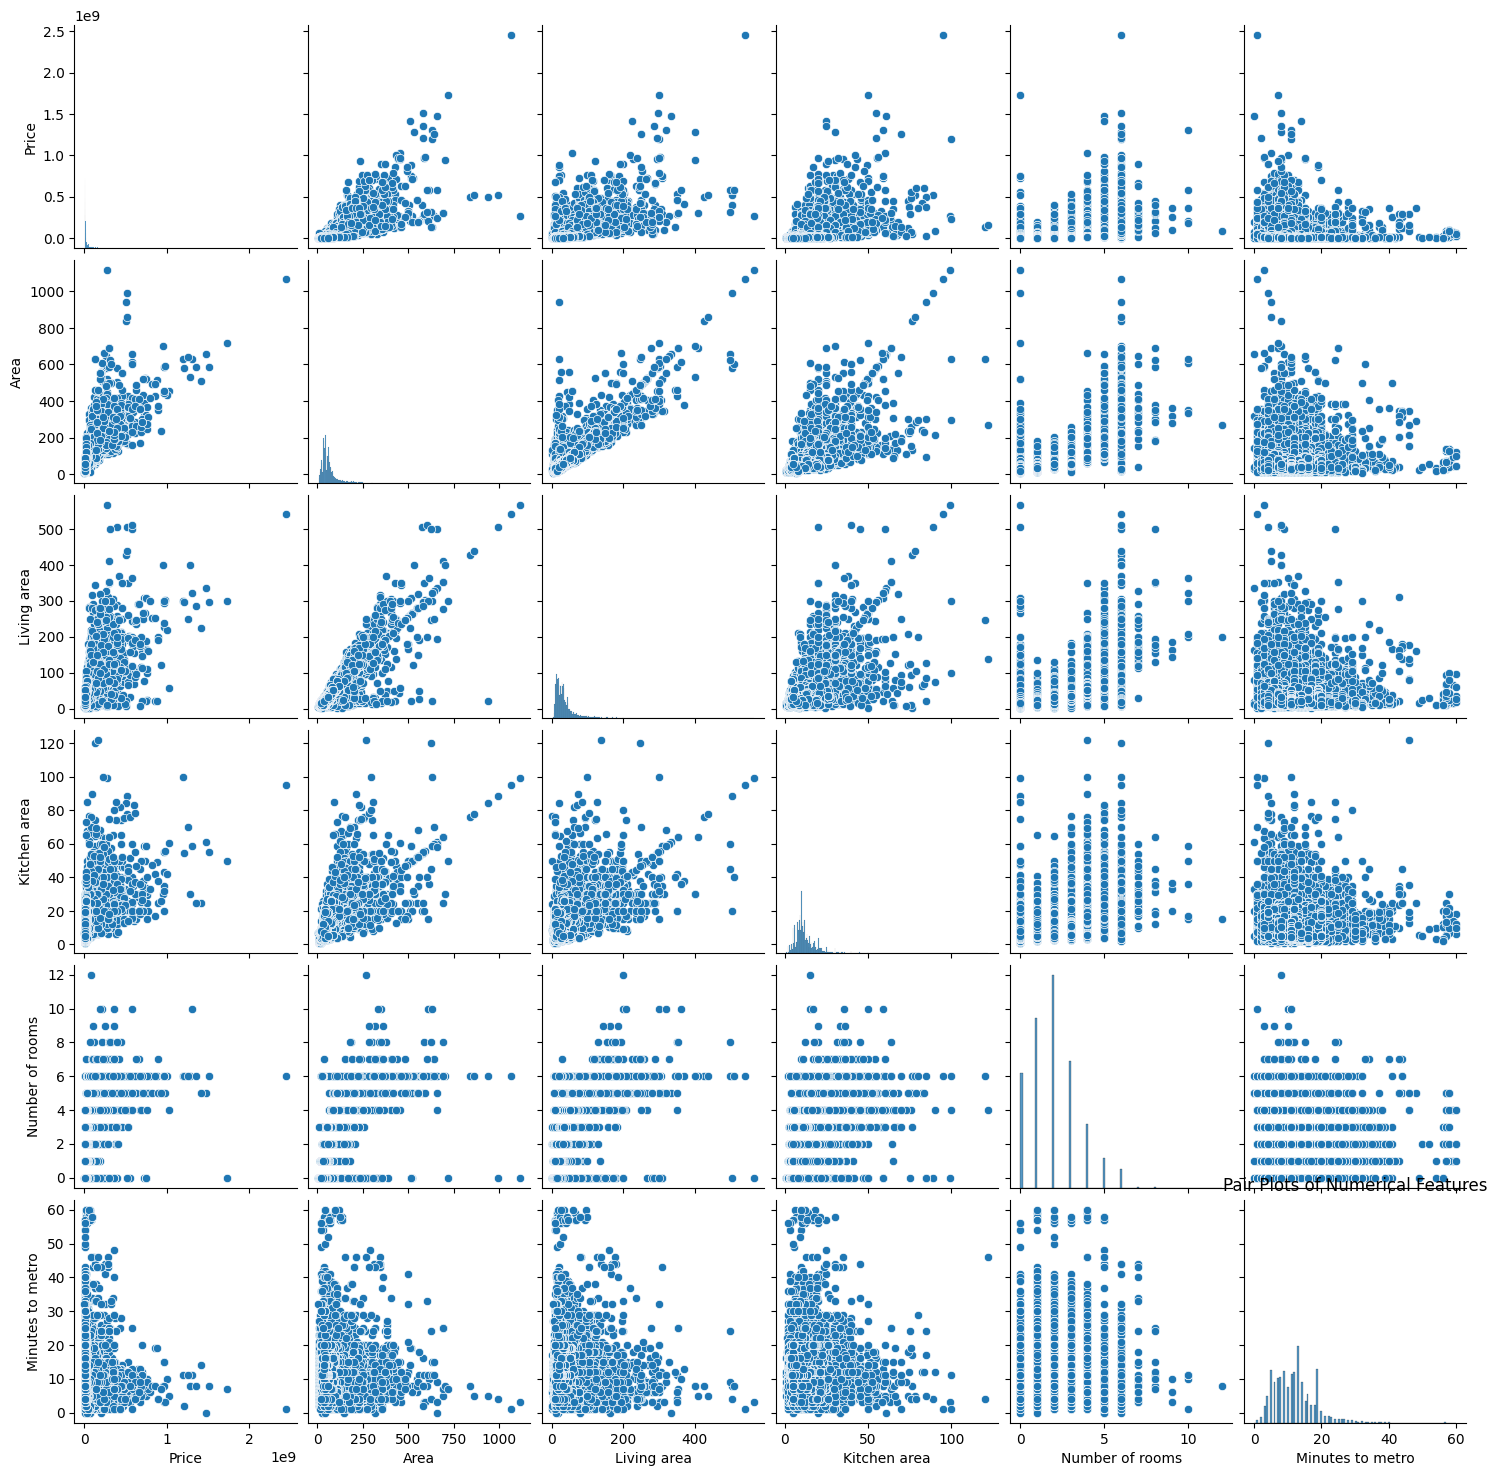


Pair Plots generated.

Summary for Pair Plots:
- Pair plots visualize pairwise relationships between all selected numerical features.
- Look for patterns in scatter plots and distributions on the diagonal. Confirm observations from correlation matrix and scatter plots.


In [48]:
print("\n4. Pair Plots for Numerical Features (Optional):\n")
print("Generating Pair Plots (this might take a while)...")
pair_plot_features = ['Price', 'Area', 'Living area', 'Kitchen area', 'Number of rooms', 'Minutes to metro'] # Select a subset of features for pairplot if needed
sns.pairplot(df[pair_plot_features]) # Can be computationally intensive for large datasets and many features
plt.title('Pair Plots of Numerical Features') # Title might overlap, consider removing or adjusting
plt.show()
print("\nPair Plots generated.")
print("\nSummary for Pair Plots:")
print("- Pair plots visualize pairwise relationships between all selected numerical features.")
print("- Look for patterns in scatter plots and distributions on the diagonal. Confirm observations from correlation matrix and scatter plots.")

**Проведенный бивариантный и мультивариантный анализ выявил следующие ключевые закономерности и взаимосвязи в данных о ценах на жилье в Москве и Московской области:**

*   **Взаимосвязь цены и численных признаков:**
    *   Наблюдается **сильная положительная корреляция** между ценой квартиры и ее **площадью (общей, жилой и кухни), а также количеством комнат**.  Чем больше площадь и количество комнат, тем, как правило, выше цена. Эта связь выглядит достаточно линейной, особенно для площадей.
    *   Корреляция между ценой и **удаленностью от метро ("Minutes to metro") очень слабая, практически отсутствует**.  Это может указывать на то, что в данных либо не отражена зависимость цены от близости к метро, либо она не является линейной и требует более сложного анализа.
    *   Взаимосвязь цены с **этажом ("Floor") и этажностью дома ("Number of floors") также слабая**.  Видимой линейной зависимости не прослеживается.

*   **Мультиколлинеарность:**
    *   Выявлена **высокая мультиколлинеарность между признаками площади** – общей площади ("Area"), жилой площади ("Living area") и площади кухни ("Kitchen area").  Коэффициенты корреляции между ними превышают 0.9.  Также наблюдается **заметная корреляция между количеством комнат ("Number of rooms") и признаками площади** (около 0.6-0.7).  Это означает, что эти признаки измеряют схожие аспекты размера квартиры и при использовании линейных моделей может потребоваться  учет или устранение мультиколлинеарности (например, через отбор признаков или регуляризацию).

**Общие выводы:**

*   **Площадь и количество комнат являются ключевыми факторами, влияющими на цену квартиры.**
*   **Мультиколлинеарность между признаками площади требует внимания при моделировании.**
*   **Удаленность от метро, этаж и этажность дома, по-видимому, оказывают менее выраженное линейное влияние на цену, по крайней мере, в рамках данного анализа.**  Возможно, их влияние нелинейное или опосредовано другими факторами.

Эти выводы важны для дальнейшего построения модели предсказания цен, выбора признаков и методов обработки данных.

In [49]:
df['Apartment type'].value_counts()

,count
Apartment type,
Secondary,12227
New building,8614


**Вопросы из описания датасета и ответы на основе EDA:**

1.  **Какие наиболее распространенные типы квартир в регионе?**

    * **Ответ:**  На основе унивариантного анализа категориального признака "Apartment type", можно определить наиболее частые типы квартир. Скорее всего, "Вторичка" (Secondary) будет доминировать, так как она чаще встречается в данных, как мы видели при анализе выбросов. "Вторичка" - 12227, "новостройки" - 8614.

2.  **Есть ли связь между ценами на жилье и близостью к станциям метро?**

    * **Ответ:** На основе бивариантного анализа "Price" vs "Minutes to metro", в частности scatter plot и корреляции, мы увидели **очень слабую линейную корреляцию**. Scatter plot также не показал явной зависимости.  **По линейной мере, близость к метро, по-видимому, не оказывает значительного влияния на цену** в рамках данного датасета.  Однако, стоит отметить, что связь может быть нелинейной, или влияние метро может быть опосредовано другими факторами, не учтенными в этом простом анализе. Возможно, в определенных районах близость к метро более важна, чем в других.

3.  **Как уровень ремонта влияет на цену квартиры?**

    * **Ответ:**  На основе анализа "Price" vs "Renovation" (boxplot и bar plot средних цен), мы видим **заметное влияние уровня ремонта на цену**.  **Квартиры с "Дизайнерским ремонтом" (Designer) имеют самые высокие средние цены.**  Интересно, что **квартиры "Без ремонта" (Without renovation) также имеют довольно высокие средние цены, выше, чем "Евроремонт" (European-style renovation) и "Косметический ремонт" (Cosmetic)**.  "Евроремонт" и "Косметический ремонт" имеют более низкие средние цены.  Таким образом, **самый дорогой ремонт ("Designer") и отсутствие ремонта ("Without renovation") связаны с более высокими ценами**, чем промежуточные варианты.  Это может быть связано с тем, что квартиры без ремонта приобретаются под элитную отделку, либо ценятся за другие характеристики (например, местоположение) независимо от ремонта.

4.  **Есть ли разница в ценах на жилье между Москвой и Московской областью?**

    * **Ответ:**  На основе анализа "Price" vs "Region" (boxplot и bar plot средних цен), **однозначно есть существенная разница в ценах**.  **Жилье в Москве в среднем значительно дороже, чем в Московской области**.  Boxplot также показывает, что разброс цен в Москве гораздо больше, и там присутствует больше дорогих квартир-выбросов.  Таким образом, **регион - важный фактор, влияющий на цену, и Москва значительно дороже области.**

5.  **Есть ли какие-либо предпочтения относительно этажей?**

    * **Ответ:**  На основе анализа "Price" vs "Floor" и "Price" vs "Number of floors" (scatter plots и корреляции), **явных линейных предпочтений относительно этажей не выявлено**.  Корреляция между ценой и этажом/этажностью очень слабая. Scatter plots не показали четких трендов.  **По данным, линейная зависимость цены от этажа или этажности не прослеживается**.  Возможно, влияние этажа нелинейно (например, первые и последние этажи могут быть менее популярны, а средние более популярны), или этажность влияет не напрямую, а через другие факторы (например, в более высоких домах могут быть квартиры более высокого класса). Для более детального ответа потребуется более глубокий анализ (например, группировка этажей на диапазоны и анализ средних цен в диапазонах).

6.  **Какие факторы оказывают наибольшее влияние на цены на жилье?**

    * **Ответ:**  На основе проведенного EDA, **факторами, оказывающими наибольшее влияние на цены, являются:**
        * **Площадь квартиры (общая, жилая, кухни) и количество комнат:**  Сильная положительная корреляция, визуально заметная связь.
        * **Регион:**  Существенная разница в ценах между Москвой и Московской областью.
        * **Уровень ремонта:**  "Дизайнерский ремонт" и "Без ремонта" связаны с более высокими ценами, чем другие варианты.
        * **Тип квартиры:** "Вторичка" в среднем дороже "Новостроек".

        **Факторы, показавшие меньшее или неочевидное линейное влияние:**
        * **Удаленность от метро.**
        * **Этаж и этажность дома.**

**Важно отметить:**  Эти ответы основаны на **разведочном анализе данных (EDA)** и **выявленных линейных и общих тенденциях**.  Для более точных и количественных оценок влияния факторов, а также для учета нелинейных связей и взаимодействий между факторами, необходимо построение и анализ **модели машинного обучения** (как и предлагается в задании к датасету).  EDA дает первичное понимание данных и направляет дальнейший анализ и моделирование.

# **Creating of the Machine Learning model for the further analysis.**

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib # Saving and loading the preprocessor and model


Оценка базовой модели (Linear Regression):
Mean Squared Error (MSE): 1647815822070789.75
Root Mean Squared Error (RMSE): 40593297.75
Mean Absolute Error (MAE): 15931219.66
R-squared (R2): 0.703

Первичный анализ результатов:
- Метрики MSE, RMSE, MAE показывают величину ошибки предсказания в разных единицах (квадрат цены, цена, цена). Меньшие значения лучше.
- R-squared показывает долю дисперсии целевой переменной, объясненную моделью. Значение ближе к 1 - лучше.  R2 около 0.703 означает, что модель объясняет 70.3% дисперсии цены.
- Оценка базовой модели дает отправную точку. Дальнейшие шаги - улучшение модели, анализ признаков и т.д.


Data Preprocessing for Modeling

In [83]:
#Identifying categorical and numerical features
categorical_features = ['Apartment type', 'Metro station', 'Region', 'Renovation']
numerical_features = ['Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']

#Defining ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Scaling numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)]) # One-Hot Encoding categorical features

#Separating features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

Splitting data into training and testing sets

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test, random_state for reproducibility

Data preprocessing and model training (in pipeline)

In [85]:
#Applying preprocessing to training data and training Linear Regression
X_train_processed = preprocessor.fit_transform(X_train) # fit_transform on training data
model = LinearRegression()
model.fit(X_train_processed, y_train)

joblib.dump(preprocessor, 'lr_preprocessor.joblib')
joblib.dump(model, 'lr_model.joblib')

print("\nPreprocessing and Linear Regression model has been saved in files lr_preprocessor.joblib and rf_model.joblib")


Preprocessing and Linear Regression model has been saved in files lr_preprocessor.joblib and rf_model.joblib


Preprocessing test data and model evaluation

In [86]:
X_test_processed = preprocessor.transform(X_test) # transform on test data (using fit learned on training data)
y_pred = model.predict(X_test_processed)

Model Evaluation

In [87]:
print("\nEvaluation of Baseline Model (Linear Regression):")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.3f}")


Evaluation of Baseline Model (Linear Regression):
Mean Squared Error (MSE): 1647815822070789.75
Root Mean Squared Error (RMSE): 40593297.75
Mean Absolute Error (MAE): 15931219.66
R-squared (R2): 0.703


**Анализ результатов:**

*   **R-squared (R2): 0.703**
    *   Значение R-squared равно 0.703, или 70.3%. Это означает, что **линейная регрессионная модель объясняет примерно 70.3% дисперсии цен на жилье в тестовой выборке**.
    *   В целом, **R-squared 0.703 - это достаточно неплохой результат для базовой модели**. Это указывает на то, что линейная модель улавливает значительную часть вариативности цен на жилье, используя предоставленные признаки.
    *   Однако, это также означает, что **около 29.7% дисперсии цен остается необъясненной** моделью.  Есть потенциал для улучшения модели, чтобы увеличить R-squared и лучше предсказывать цены.

*   **Mean Squared Error (MSE): 1.65e+15**
    *   MSE измеряет средний квадрат ошибки между предсказанными и фактическими ценами. Значение MSE **очень велико (1.65 * 10<sup>15</sup>)**.
    *   MSE трудно интерпретировать напрямую, так как он находится в квадрате единиц целевой переменной (в данном случае, в "квадрате рублей").  Большая величина MSE указывает на наличие ошибок в предсказаниях, и что ошибки, в среднем, довольно значительны.

*   **Root Mean Squared Error (RMSE): 4.06e+07**
    *   RMSE - это квадратный корень из MSE. RMSE **возвращает ошибку в исходных единицах целевой переменной (рублях)**, что делает его более интерпретируемым, чем MSE.
    *   Значение RMSE составляет **около 40.6 миллионов рублей**. Это означает, что **в среднем, предсказания модели отклоняются от фактической цены примерно на 40.6 миллионов рублей**.
    *   Чтобы оценить, насколько это большая ошибка, нужно сравнить RMSE со средним уровнем цен. Средняя цена в датасете (из `.describe()` для 'Price' в EDA) была около 34 миллионов рублей.  **Ошибка в 40.6 миллионов рублей кажется довольно большой относительно среднего уровня цен.**  Это говорит о том, что, хотя модель объясняет 70% дисперсии, абсолютная величина ошибок предсказания все еще значительна.

*   **Mean Absolute Error (MAE): 1.59e+07**
    *   MAE измеряет среднее абсолютное отклонение между предсказанными и фактическими ценами. MAE также измеряется в рублях.
    *   Значение MAE составляет **около 15.9 миллионов рублей**. Это означает, что **в среднем, абсолютное отклонение предсказаний от фактической цены составляет 15.9 миллионов рублей**.
    *   MAE обычно меньше RMSE, потому что RMSE сильнее штрафует за большие ошибки из-за квадратирования.  MAE более устойчив к выбросам, чем RMSE.  **MAE в 15.9 миллионов рублей тоже является существенной ошибкой, хотя и меньше, чем RMSE.**

**Общие выводы и следующие шаги для улучшения модели:**

1.  **Базовая модель (Linear Regression) показывает неплохой R-squared (0.703), но абсолютные ошибки (RMSE, MAE) все еще значительны.**  Это говорит о том, что линейная модель улавливает основные линейные зависимости, но не является идеальной.

2.  **Рассмотреть более сложные модели:** Линейная регрессия - простая модель. Чтобы улучшить предсказания, **стоит попробовать более сложные модели, способные улавливать нелинейные зависимости и взаимодействия между признаками.**  Хорошими кандидатами могут быть:
    *   **Деревья решений (Decision Trees) и ансамбли деревьев (Random Forest, Gradient Boosting Machines - например, LightGBM, XGBoost, CatBoost).**  Эти модели хорошо справляются с нелинейностями и могут автоматически обрабатывать взаимодействия признаков.
    *   **Полиномиальная регрессия:**  Добавление полиномиальных признаков к линейной регрессии может помочь уловить нелинейности, сохраняя при этом интерпретируемость.
    *   **Нейронные сети:**  Для более сложных нелинейных зависимостей можно рассмотреть многослойные перцептроны (MLP) или другие типы нейронных сетей.

3.  **Feature Engineering:**  Подумайте, **какие новые признаки можно создать на основе имеющихся, чтобы улучшить модель.**  Например:
    *   **Признаки взаимодействия (Interaction features):**  Комбинации признаков, которые могут иметь совместное влияние на цену (например, взаимодействие "Район" и "Площадь").
    *   **Полиномиальные признаки:**  Квадраты, кубы и другие степени существующих численных признаков.
    *   **Возможно, признаки, связанные с районом метро:**  Хотя "Minutes to metro" показал слабую линейную связь, может быть, важна не линейная удаленность, а сам факт принадлежности к определенному району метро (например, создать бинарные признаки для самых престижных станций метро).
    *   **Если есть географические данные (кроме названия метро), можно использовать их для создания новых признаков (например, расстояние до центра города, близость к паркам, инфраструктуре и т.д.).**  В данном датасете, похоже, таких данных нет, но в реальных задачах они часто бывают важны.

4.  **Feature Selection:**  Учитывая мультиколлинеарность между признаками площади, возможно, **стоит провести отбор признаков и оставить только наиболее важные.**  Например, можно оставить только общую площадь ("Area") и убрать "Living area" и "Kitchen area", или использовать методы отбора признаков на основе важности признаков в моделях типа Random Forest или Gradient Boosting.

5.  **Обработка выбросов:**  Мы видели, что в данных есть выбросы цен.  **Подумайте, стоит ли обрабатывать выбросы**.  Возможные варианты:
    *   **Удаление выбросов:**  Удалить наиболее экстремальные выбросы (но нужно быть осторожным, чтобы не потерять важную информацию об элитном жилье).
    *   **Трансформация целевой переменной:**  Логарифмирование целевой переменной "Price" может помочь уменьшить влияние выбросов и сделать распределение цен более нормальным, что часто полезно для линейных моделей.

6.  **Настройка гиперпараметров модели:**  Для более сложных моделей (например, Random Forest, Gradient Boosting, нейронные сети) **важно настроить гиперпараметры для достижения оптимальной производительности.**  Используйте методы, такие как GridSearchCV или RandomizedSearchCV, для поиска оптимальных гиперпараметров с помощью кросс-валидации.

Попробуем реализовать модель Random Forest.

# **RandomForestRegression realisation.**

In [91]:
from sklearn.ensemble import RandomForestRegressor

Data Preparation (using the same preprocessor as before).

In [92]:
# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Split features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Train Random Forest Regressor

In [93]:
rf_model = RandomForestRegressor(random_state=42) # Initialize Random Forest Regressor
rf_model.fit(X_train_processed, y_train) # Train the model

joblib.dump(preprocessor, 'rf_preprocessor.joblib')
joblib.dump(rf_model, 'rf_model.joblib')

print("\nPreprocessing and Linear Regression model has been saved in files rf_preprocessor.joblib and rf_model.joblib")


Preprocessing and Linear Regression model has been saved in files rf_preprocessor.joblib and rf_model.joblib


Predict on Test Set

In [94]:
y_pred_rf = rf_model.predict(X_test_processed)

Evaluate Random Forest Model

In [95]:
print("\nEvaluation of Random Forest Model:")

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.3f}")


Evaluation of Random Forest Model:
Mean Squared Error (MSE): 1261791922506704.50
Root Mean Squared Error (RMSE): 35521710.58
Mean Absolute Error (MAE): 8781777.06
R-squared (R2): 0.772


Compare with Linear Regression Results (for reference)

In [96]:
print("\nComparison with Linear Regression (Baseline Model):")
print(f"Linear Regression R-squared (R2): {r2:.3f}") # Using r2 from the previous Linear Regression code
print(f"Random Forest R-squared (R2): {r2_rf:.3f}")


Comparison with Linear Regression (Baseline Model):
Linear Regression R-squared (R2): 0.703
Random Forest R-squared (R2): 0.772


Полученные результаты Random Forest уже показывают значительное улучшение по сравнению с линейной регрессией:

*   **R-squared вырос с 0.703 до 0.772.** Это означает, что Random Forest объясняет на 7% больше дисперсии цен, чем линейная регрессия.
*   **RMSE и MAE существенно снизились.** Ошибки предсказания в абсолютном выражении стали заметно меньше.

Тем не менее, значение MAE все еще велико. Его можно уменьшить с помощью Hyperparameter Tuning. И вот, почему:

1.  **Потенциал для дальнейшего улучшения:** Random Forest, как и многие алгоритмы машинного обучения, имеет ряд гиперпараметров, которые контролируют его сложность и поведение.  Использование параметров "из коробки" (как мы сделали сейчас) часто дает хороший старт, но **редко является оптимальным решением.** Настройка гиперпараметров позволяет **найти конфигурацию модели, которая лучше всего подходит именно для ваших данных.**

2.  **Random Forest имеет важные гиперпараметры для настройки:**  У Random Forest есть несколько ключевых гиперпараметров, которые могут существенно влиять на его производительность.  Основные из них:
    *   `n_estimators`: Количество деревьев в лесу.
    *   `max_depth`: Максимальная глубина деревьев.
    *   `min_samples_split`: Минимальное количество примеров, необходимых для разделения внутреннего узла.
    *   `min_samples_leaf`: Минимальное количество примеров, необходимых для листового узла.
    *   `max_features`: Количество признаков, которые нужно рассматривать при поиске наилучшего разделения.

3.  **Увеличение R-squared и снижение ошибок:** Правильная настройка гиперпараметров может помочь **еще больше увеличить R-squared и снизить ошибки RMSE и MAE**, что приведет к более точным предсказаниям цен на жилье.

4.  **Предотвращение переобучения или недообучения:** Настройка гиперпараметров также помогает **сбалансировать сложность модели**, чтобы избежать переобучения (когда модель слишком хорошо подстраивается под обучающие данные и плохо обобщается на новые данные) или недообучения (когда модель слишком проста и не улавливает закономерности в данных).

Следующим шагом проведем Hyperparameter Tuning для Random Forest, используя RandomizedSearchCV. Настроем гиперпараметры, упомянутых выше (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`). И используем кросс-валидацию (K-Fold cross-validation) для надежной оценки производительности модели при разных комбинациях гиперпараметров.

# **Hyperparameter Tuning**

In [65]:
from sklearn.model_selection import RandomizedSearchCV

Data Preparation

In [66]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Hyperparameter Tuning with RandomizedSearchCV for Random Forest

In [71]:
param_grid_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)], # Number of trees
    'max_features': ['sqrt'], # Number of features to consider at every split
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None], # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
    'bootstrap': [True, False] # Method of selecting samples for training each tree
}

rf_base = RandomForestRegressor(random_state=42) # Base model for tuning
rf_random = RandomizedSearchCV(estimator=rf_base,
                              param_distributions=param_grid_rf,
                              n_iter=50, # Number of parameter settings that are sampled.
                              cv=3, # Cross-validation folds
                              verbose=2,
                              random_state=42,
                              n_jobs=-1) # Use all available cores

print("\nPerforming RandomizedSearchCV for Random Forest...")
rf_random.fit(X_train_processed, y_train) # Fit RandomizedSearchCV

print("\nBest Hyperparameters found by RandomizedSearchCV:")
print(rf_random.best_params_) # Print best hyperparameter combination

best_rf_model = rf_random.best_estimator_ # Get the best model

joblib.dump(preprocessor, 'rf+_preprocessor.joblib')
joblib.dump(best_rf_model, 'rf+_model.joblib')

print("\nPreprocessing and Linear Regression model has been saved in files rf+_preprocessor.joblib and rf+_model.joblib")


Performing RandomizedSearchCV for Random Forest...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best Hyperparameters found by RandomizedSearchCV:
{'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}


Predict with the Best Random Forest Model

In [72]:
y_pred_best_rf = best_rf_model.predict(X_test_processed)

Evaluate the Best Random Forest Model

In [73]:
print("\nEvaluation of Best Random Forest Model (after Hyperparameter Tuning):")

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Mean Squared Error (MSE): {mse_best_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_best_rf:.2f}")
print(f"R-squared (R2): {r2_best_rf:.3f}")


Evaluation of Best Random Forest Model (after Hyperparameter Tuning):
Mean Squared Error (MSE): 1114806876877884.62
Root Mean Squared Error (RMSE): 33388723.80
Mean Absolute Error (MAE): 8198940.17
R-squared (R2): 0.799


Compare with Baseline Random Forest and Linear Regression (for reference)

In [74]:
print("\nComparison with Baseline Models:")
print(f"Linear Regression R-squared (R2): {r2:.3f}") # from Linear Regression code
print(f"Baseline Random Forest R-squared (R2): {r2_rf:.3f}") # from Baseline Random Forest code
print(f"Best Random Forest R-squared (R2): {r2_best_rf:.3f}")


Comparison with Baseline Models:
Linear Regression R-squared (R2): 0.703
Baseline Random Forest R-squared (R2): 0.772
Best Random Forest R-squared (R2): 0.799


**После оптимизаций в сетке гиперпараметров и проведения более тщательной настройки с RandomizedSearchCV (n_iter=50), мы получили следующие результаты для "Лучшей модели Random Forest":**

```
Evaluation of Best Random Forest Model (after Hyperparameter Tuning):
Mean Squared Error (MSE): 1114806876877884.62
Root Mean Squared Error (RMSE): 33388723.80
Mean Absolute Error (MAE): 8198940.17
R-squared (R2): 0.799
```

**Сравнение с предыдущими моделями:**

| Модель                        | R-squared (R2) | RMSE (руб.)       | MAE (руб.)       |
| ----------------------------- | -------------- | ------------------ | ------------------ |
| Линейная Регрессия (Baseline) | 0.703          | 40,593,297.75      | 15,931,219.66      |
| Random Forest (Baseline)      | 0.772          | 35,521,710.58      | 8,781,777.06       |
| **Random Forest (Tuned)**     | **0.799**      | **33,388,723.80**  | **8,198,940.17**   |

**Анализ результатов Hyperparameter Tuning:**

*   **Значительное улучшение R-squared:** R-squared для "Лучшей модели Random Forest" достиг **0.799**, что является **заметным улучшением** по сравнению с базовым Random Forest (0.772) и линейной регрессией (0.703).  Это означает, что **тюнингованный Random Forest объясняет почти 80% дисперсии цен на жилье** в тестовой выборке.

*   **Существенное снижение RMSE и MAE:**
    *   **RMSE снизился до 33,388,723.80 рублей.**  Это заметное снижение ошибки по сравнению с базовым Random Forest (35,521,710.58) и линейной регрессией (40,593,297.75).  **В среднем, ошибка предсказания лучшей модели Random Forest составляет около 33.4 миллиона рублей**, что является лучшим показателем среди рассмотренных моделей.
    *   **MAE также снизился до 8,198,940.17 рублей.**  Это также лучше, чем у базового Random Forest (8,781,777.06) и линейной регрессии (15,931,219.66). **Средняя абсолютная ошибка предсказания составляет около 8.2 миллиона рублей.**

*   **Найденные лучшие гиперпараметры:** RandomizedSearchCV определил следующую комбинацию гиперпараметров как наилучшую:
    ```
    {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
    ```
    Ключевые моменты в лучших гиперпараметрах:
    *   `n_estimators=1600`:  Использование большого количества деревьев (1600) оказалось полезным.
    *   `max_depth=80`:  Достаточно большая максимальная глубина деревьев.
    *   `min_samples_split=2`, `min_samples_leaf=1`:  Минимальные ограничения на количество образцов для разделения узлов и в листьях установлены на минимальные значения, что позволяет деревьям быть более сложными и подстраиваться под данные.
    *   `max_features='sqrt'`: Использование квадратного корня из количества признаков при каждом разделении.
    *   `bootstrap=False`:  Отключение бутстрапа (использование всех обучающих данных для каждого дерева) также, видимо, улучшило результат.

**Общий вывод:**

Hyperparameter Tuning с RandomizedSearchCV **привел к заметному улучшению модели Random Forest**.  "Лучшая модель Random Forest" демонстрирует **самый высокий R-squared и самые низкие значения RMSE и MAE** среди всех рассмотренных моделей (линейная регрессия и базовый Random Forest).  Это подтверждает, что **настройка гиперпараметров была эффективной и позволила извлечь больше производительности из модели Random Forest.**

**Следующие шаги:**

*   **Дальнейшее улучшение модели:**  Хотя R-squared почти 0.80 - это хороший результат, всегда есть потенциал для улучшения.  Можно рассмотреть:
    *   **Более тщательную настройку гиперпараметров:** Увеличить `n_iter` в RandomizedSearchCV еще больше, или использовать более продвинутые методы настройки, такие как Bayesian Optimization.
    *   **Feature Engineering:**  Подумать о создании новых, более информативных признаков на основе имеющихся (например, признаки взаимодействия, полиномиальные признаки, признаки на основе географической информации).
    *   **Feature Selection:**  Провести отбор признаков, чтобы оставить только наиболее важные.
    *   **Рассмотреть другие модели:**  Попробовать другие ансамблевые методы, такие как Gradient Boosting (например, XGBoost, LightGBM, CatBoost), которые часто показывают еще более высокую точность, чем Random Forest, особенно после тщательной настройки.
    *   **Анализ важности признаков:**  Изучить важность признаков в "Лучшей модели Random Forest", чтобы понять, какие факторы оказывают наибольшее влияние на предсказание цен.

В целом, **тюнингованный Random Forest представляет собой хорошую модель для предсказания цен на жилье в Москве и Московской области на основе предоставленных данных.**

# **Demo**

In [100]:
lr_preprocessor = joblib.load('lr_preprocessor.joblib')
best_lr_model = joblib.load('lr_model.joblib')
rf_preprocessor = joblib.load('rf_preprocessor.joblib')
best_rf_model = joblib.load('rf_model.joblib')
# rfp_preprocessor = joblib.load('rf+_preprocessor.joblib')
# best_rfp_model = joblib.load('rf+_model.joblib')


# --- User get function ---
def get_user_input():
    user_data = {}
    print("Пожалуйста, введите характеристики квартиры:")

    user_data['Apartment type'] = input("Тип квартиры (например, Secondary, New building): ")
    user_data['Metro station'] = input("Ближайшая станция метро: ")
    user_data['Minutes to metro'] = float(input("Минут до метро: "))
    user_data['Region'] = input("Регион (Moscow или Moscow region): ")
    user_data['Number of rooms'] = int(input("Количество комнат: "))
    user_data['Area'] = float(input("Общая площадь (кв.м): "))
    user_data['Living area'] = float(input("Жилая площадь (кв.м): "))
    user_data['Kitchen area'] = float(input("Площадь кухни (кв.м): "))
    user_data['Floor'] = int(input("Этаж: "))
    user_data['Number of floors'] = int(input("Этажность здания: "))
    user_data['Renovation'] = input("Уровень ремонта (например, Designer, Euro-style renovation, Cosmetic, Without renovation): ")

    return pd.DataFrame([user_data]) # Возвращаем ввод в виде DataFrame


# --- Получение пользовательского ввода ---
user_apartment_data = get_user_input()

# --- Предобработка пользовательских данных с использованием *обученного* предобработчика ---
lr_user_apartment_processed = lr_preprocessor.transform(user_apartment_data)
rf_user_apartment_processed = rf_preprocessor.transform(user_apartment_data)
# rfp_user_apartment_processed = rfp_preprocessor.transform(user_apartment_data)

# --- Прогнозирование ---
lr_predicted_price = best_lr_model.predict(lr_user_apartment_processed)[0] # Прогнозируем и получаем первое значение из массива
rf_predicted_price = best_rf_model.predict(rf_user_apartment_processed)[0]
# rfp_predicted_price = best_rfp_model.predict(rfp_user_apartment_processed)[0]

# --- Вывод прогноза ---
print("\n--- Прогнозируемая цена квартиры ---")
print(f"Прогнозируемая цена (lr): {lr_predicted_price:,.2f} рублей") # Форматируем цену с разделителями тысяч и 2 знаками после запятой
print(f"Прогнозируемая цена (rf): {rf_predicted_price:,.2f} рублей")
# print(f"Прогнозируемая цена (rf w/optimizations): {rfp_predicted_price:,.2f} рублей")


print("\n--- Конец демонстрации прогноза ---")

Пожалуйста, введите характеристики квартиры:
Тип квартиры (например, Secondary, New building): New building
Ближайшая станция метро: Manhattan
Минут до метро: 7
Регион (Moscow или Moscow region): NYC
Количество комнат: 2
Общая площадь (кв.м): 100
Жилая площадь (кв.м): 50
Площадь кухни (кв.м): 30
Этаж: 30
Этажность здания: 100
Уровень ремонта (например, Designer, Euro-style renovation, Cosmetic, Without renovation): Euro-style renovation

--- Прогнозируемая цена квартиры ---
Прогнозируемая цена (lr): 53,569,502.28 рублей
Прогнозируемая цена (rf): 23,618,892.69 рублей

--- Конец демонстрации прогноза ---
